I wrote a post in 2016 on text mining the bible with R. 
[That post](https://emelineliu.com/2016/01/10/bible1/) remains the most popular post on this site according to Google Analytics.

I still use R occasionally at work, butttt I work more on Java and my heart will probably eternally belong to Python.
(List comprehensions! Need I say more!)
I figured I would revisit the problem of retrieving the most common words in a text using Python in a Jupyter notebook.


The notebook was converted to an html file using [nbconvert](https://github.com/jupyter/nbconvert). You can also access this notebook in the `_scripts` folder of the website's repo if you want to play around with it.

---

The following code segment is just some imports:
- re - for removing punctionation using regex
- requests - to retrieve the text files from Project Gutenberg
- seaborn - for plotting
- Counter - creates a counting dictionary from a list, so the key will be unique items in the list and the value will be the number of occurrences
- stopwords - a list of commonly occurring words in the English language, such as "the" and "and"

In [2]:
import re
import requests
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords


# These stopwords are commonly used words in the English language
STOPWORDS = {re.sub(r'[^\w\s]', '', word) for word in stopwords.words('english')}
# Adding custom words
STOPWORDS.add("gutenberg")
STOPWORDS.add("ebook")

Project Gutenberg has quite a few books available with the option to access them as text files on [their website](http://www.gutenberg.org/wiki/Main_Page). The last time I did this text analysis, I downloaded a variety of text files. 

This time, I'm using the call `requests.get(url)` to retrieve the full text file from the Project Gutenberg website in the `get_text(url)` function. This means I don't have to manually download the file and point to that location in this notebook. I can specify just the url ☺︎

Then, once I retrieve the text from that url, I do some cleaning based on manually investigating the files. There is some extraneous text that occurs before and after those *** lines, so might as well cut that off. I then return the text as a list of lines.

In the `get_word_counter(url)` function, I call `get_text(url`) to retrieve the text, then do some additional cleaning on the word level. Every word is lower-cased. I also remove all punctuation.

Then, once there's a list of cleaned words, I send that list into the constructor for a Counter, which will create a dictionary counted entities from the list. The Counter class has a function `.most_common(n)` to retrieve the `n` most commonly occuring items in the list.

In [4]:
def get_text(url):
    text = requests.get(url).text
    # trim everything before this line
    clean = text.split("*** START OF THIS PROJECT GUTENBERG EBOOK")[1]
    # trim everything after this line
    clean = clean.split("*** END OF THIS PROJECT GUTENBERG EBOOK")[0]
    # split the text into lines and remove extraneous newlines
    return [line for line in clean.splitlines() if line.strip()]


def get_word_counter(url):
    text = get_text(url)
    # remove puncuation and remove words that are in the STOPWORDS set
    words = [word.lower() for line in text for word in line.split(" ") if word]
    words = [re.sub(r'[^\w\s]', '', word) for word in words if re.sub(r'[^\w\s]', '', word) not in STOPWORDS]
    return Counter(words)


top_n = 10
title = "The King James Bible"
url = "http://www.gutenberg.org/cache/epub/10/pg10.txt"
counter = get_word_counter(url)
counter.most_common(top_n)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]

Looks like "shall" is the most common word. I guess it makes sense that the bible would be quite prescriptive in its language...

Well that's cool and all, but let's make a picture too. The snippet below uses the Seaborn plotting library to create a barplot from that counter. I see seaborn is most commonly imported as `sns` [due to a joke referencing Samuel Seaborn from the West Wing](https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns), but that's just too much for me. So I import it as `sb`.....

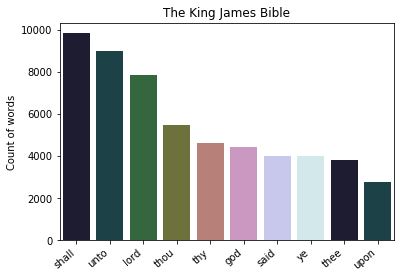

In [84]:
top_words = counter.most_common(top_n)
word_label = [word for (word, count) in top_words]
count_words = [count for (word, count) in top_words]
ax = sb.barplot(x=word_label, y=count_words, palette=sb.color_palette("cubehelix", 8))
ax.set_title(title)
ax.set(ylabel='Count of words')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

What about the least common words?

To retrieve the least common words, this call gets the entire ordered list of (item, occurrence) pairs and then retrieves the `n` last terms:

In [81]:
n = 20
bottom_words = counter.most_common()[:-n-1:-1]
bottom_words

[('project', 1),
 ('proceeding', 1),
 ('transparent', 1),
 ('chrysoprasus', 1),
 ('chrysolyte', 1),
 ('sardonyx', 1),
 ('chalcedony', 1),
 ('omnipotent', 1),
 ('pipers', 1),
 ('musicians', 1),
 ('costliness', 1),
 ('sailors', 1),
 ('slaves', 1),
 ('thyine', 1),
 ('delicacies', 1),
 ('martyrs', 1),
 ('coloured', 1),
 ('armageddon', 1),
 ('gnawed', 1),
 ('scorch', 1)]

Fascinating, apparently sardonyx is a type of onyx that has layers of sard. What a straightforward name.

Then I figured I might look at some other text files on Project Gutenberg. I picked Ion, Frankenstein, and Little Women for a little further investigation. I shoved those into a dictionary so I could iterate to generate multiple plots. Then might as well put the code to generate the barplot into a function:

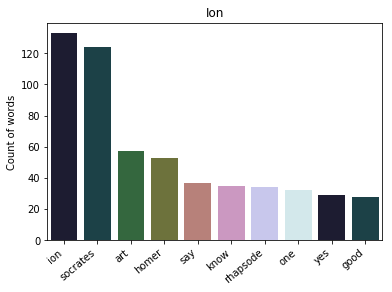

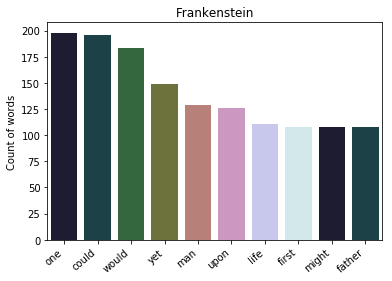

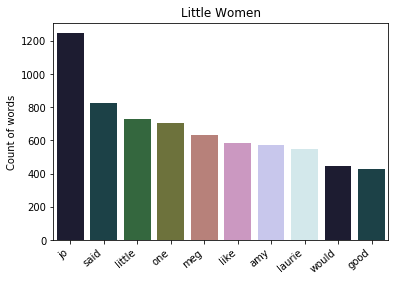

In [5]:
def create_barplot(title, counter):
    word_label = [word for (word, count) in counter]
    count_words = [count for (word, count) in counter]
    ax = sb.barplot(x=word_label, y=count_words, palette=sb.color_palette("cubehelix", 8))
    ax.set_title(title)
    ax.set(ylabel='Count of words')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # make plot show up
    plt.show()

more_titles = {"Ion": "http://www.gutenberg.org/cache/epub/1635/pg1635.txt",
              "Frankenstein": "http://www.gutenberg.org/files/84/84-0.txt",
              "Little Women": "http://www.gutenberg.org/cache/epub/514/pg514.txt"}

for title, url in more_titles.items():
    counter = get_word_counter(url).most_common(top_n)
    create_barplot(title, counter)

I've read Frankenstein and Little Women (this one, many times...), but never Ion. From these plots, I suppose Ion is about Ion.

Totally forgot the utterly depressing narative of Frankenstein's monster desperately longing for a father. 

And if there was any doubt as to who the main character of Little Women is, well here we are.

That's all for now. Feel free to comment below or email me if you have any questions.